In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

### Zad 1

In [3]:
data_x = np.array([1, 2, 3])
data_y = np.array([1, 3, 8])

In [4]:
def least_square_fit(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    a = (xy_mean - (x_mean * y_mean)) / np.var(x)
    b = y_mean - a * x_mean
    return a, b

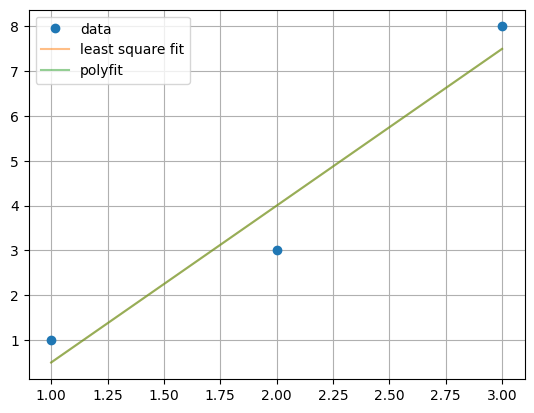

In [5]:
a_lsf, b_lsf = least_square_fit(data_x, data_y)
y_lsf = a_lsf * data_x + b_lsf

np_poly = np.polyfit(data_x, data_y, deg=1)
y_np = np.polyval(np_poly, data_x)

plt.plot(data_x, data_y, "o", label="data")
plt.plot(data_x, y_lsf, alpha = 0.5, label="least square fit")
plt.plot(data_x, y_np, alpha=0.5, label="polyfit")
plt.legend()
plt.grid(True)

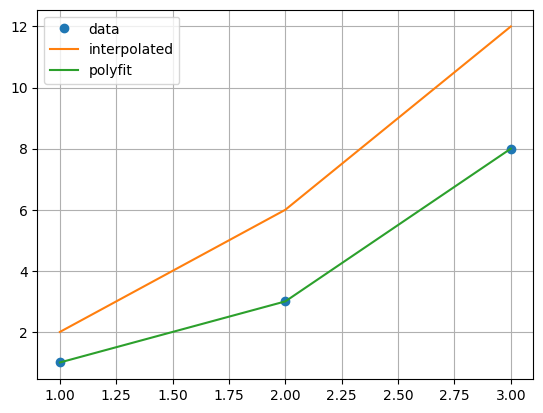

In [6]:
function = "x**2+x"
interpolated_y = eval(function, {"x": data_x})
interpolated_y

poly = np.polyfit(data_x, data_y, deg=2)
y_fit = np.polyval(poly, data_x)

plt.plot(data_x, data_y, 'o', label="data")
plt.plot(data_x, interpolated_y, label="interpolated")
plt.plot(data_x, y_fit, label="polyfit")
plt.legend()
plt.grid(True)

### Zad 2

In [7]:
# https://en.wikipedia.org/wiki/Square_wave#Fourier_analysis
def fourier_expansion(t, f, number_of_sins):
    sin_sum = 0
    for i in range(1, number_of_sins * 2, 2):
        sin_sum += np.sin(2 * np.pi * f * t * i ) / i

    return sin_sum * 4 / np.pi

In [8]:
def mse(a, b):
    return np.square(np.subtract(a, b)).mean()

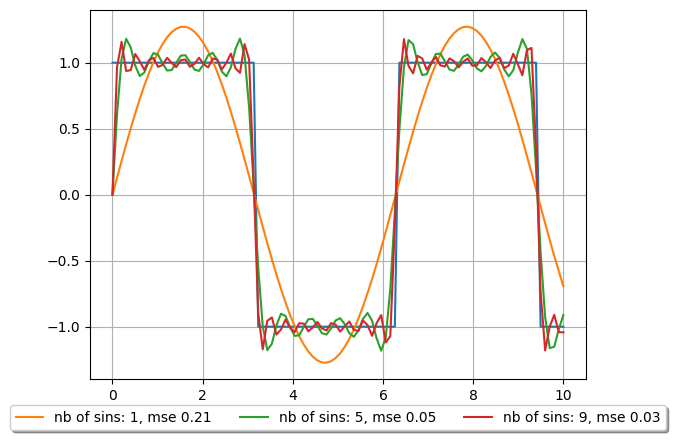

In [9]:
t = np.linspace(0, 10, 100)
square = scipy.signal.square(t)  # period 2pi

plt.plot(t, square)
for nb_of_sins in range(1, 10, 4):
    sins = fourier_expansion(t, 1/(2*np.pi), nb_of_sins)
    e = mse(sins, square)
    plt.plot(t, sins, label=f"nb of sins: {nb_of_sins}, mse {e:.2f}")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)
plt.grid(True)

### Zad 3

In [164]:
def konwolucja_iter(obraz, macierz):
    size=obraz.shape[0]-macierz.shape[0]+1
    k=macierz.shape[0]
    convolved_img=np.zeros(shape=(size, size))
    for i in range(size):
        for j in range(size):
            mat=obraz[i:i+k, j:j+k]
            pixel=np.sum(np.multiply(mat, macierz))
            if pixel > 0 : convolved_img[i, j] = pixel
            else : convolved_img[i, j] = 0

    return convolved_img

def konwolucja_fft(obraz, macierz): # dwuwymiarowa w dziedzinie czętotliwości
    size=obraz.shape[0] - macierz.shape[0] + 1
    convolved_img = np.fft.fft2(obraz, s=(size, size)) * np.fft.fft2(macierz, s=(size, size))
    convolved_img = np.fft.ifft2(convolved_img).real

    return convolved_img

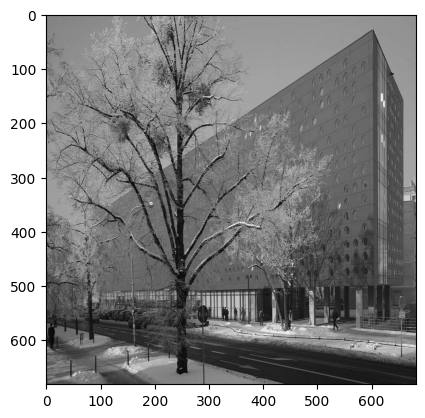

In [134]:
image = cv2.imread("obraz.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (682,682))
plt.imshow(image, cmap="grey")

Maska pozwalająca na wyostrzenie zdjęcia, obraz dla transfomraty rożni się ze względu na ujemne wartość otrzymane z odwrotnej transformaty.

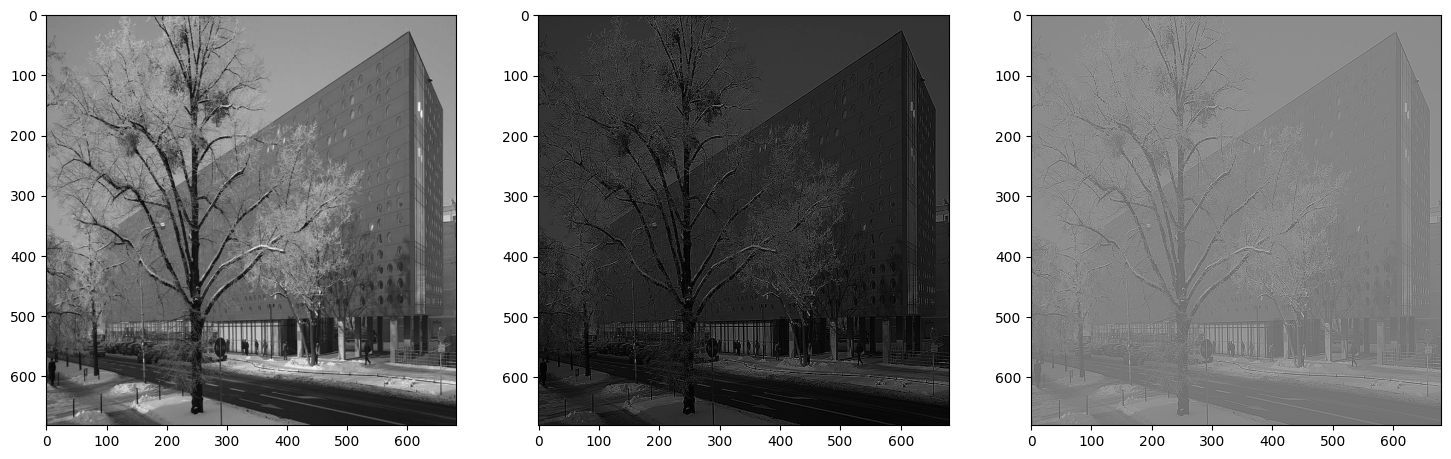

In [176]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

median_image = konwolucja_iter(image, sharpen)
fft_median_image = konwolucja_fft(image, sharpen)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 12)
ax[0].imshow(image, cmap="grey")
ax[1].imshow(median_image, cmap='grey')
ax[2].imshow(fft_median_image, cmap='grey')

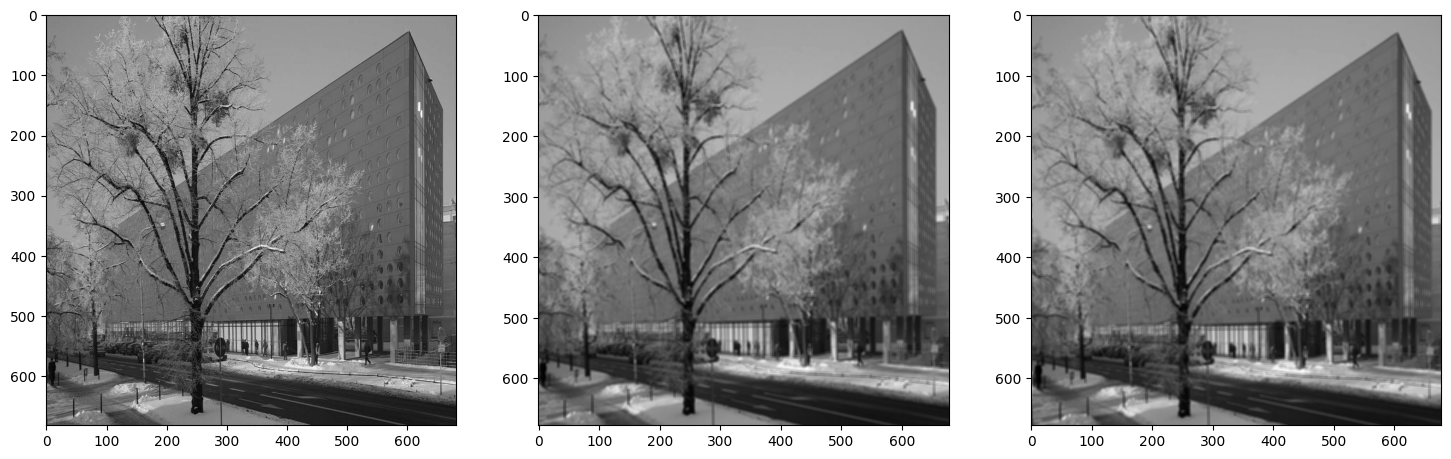

In [179]:
median = np.full((5, 5), 1/(5 * 5))

median_image = konwolucja_iter(image, median)
fft_median_image = konwolucja_fft(image, median)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 12)
ax[0].imshow(image, cmap="grey")
ax[1].imshow(median_image, cmap='grey')
ax[2].imshow(fft_median_image, cmap='grey')

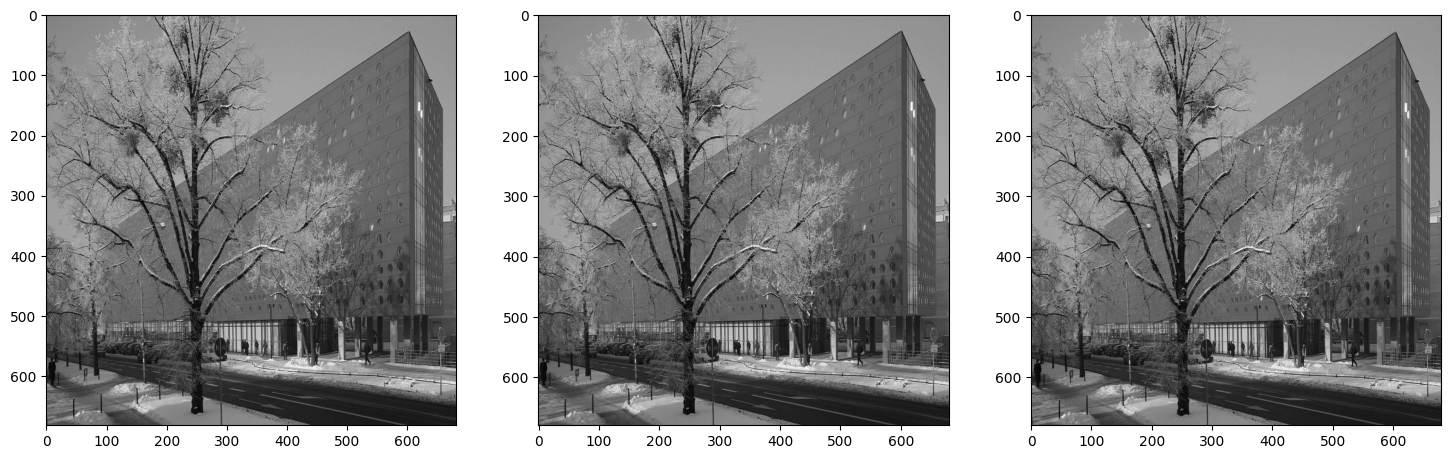

In [174]:
identity = np.zeros((3, 3))
identity[3 // 2, 3 // 2] = 1

identity_image = konwolucja_iter(image, identity)
fft_identity_image = konwolucja_fft(image, identity)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 12)
ax[0].imshow(image, cmap="grey")
ax[1].imshow(identity_image, cmap='grey')
ax[2].imshow(fft_identity_image, cmap='grey')

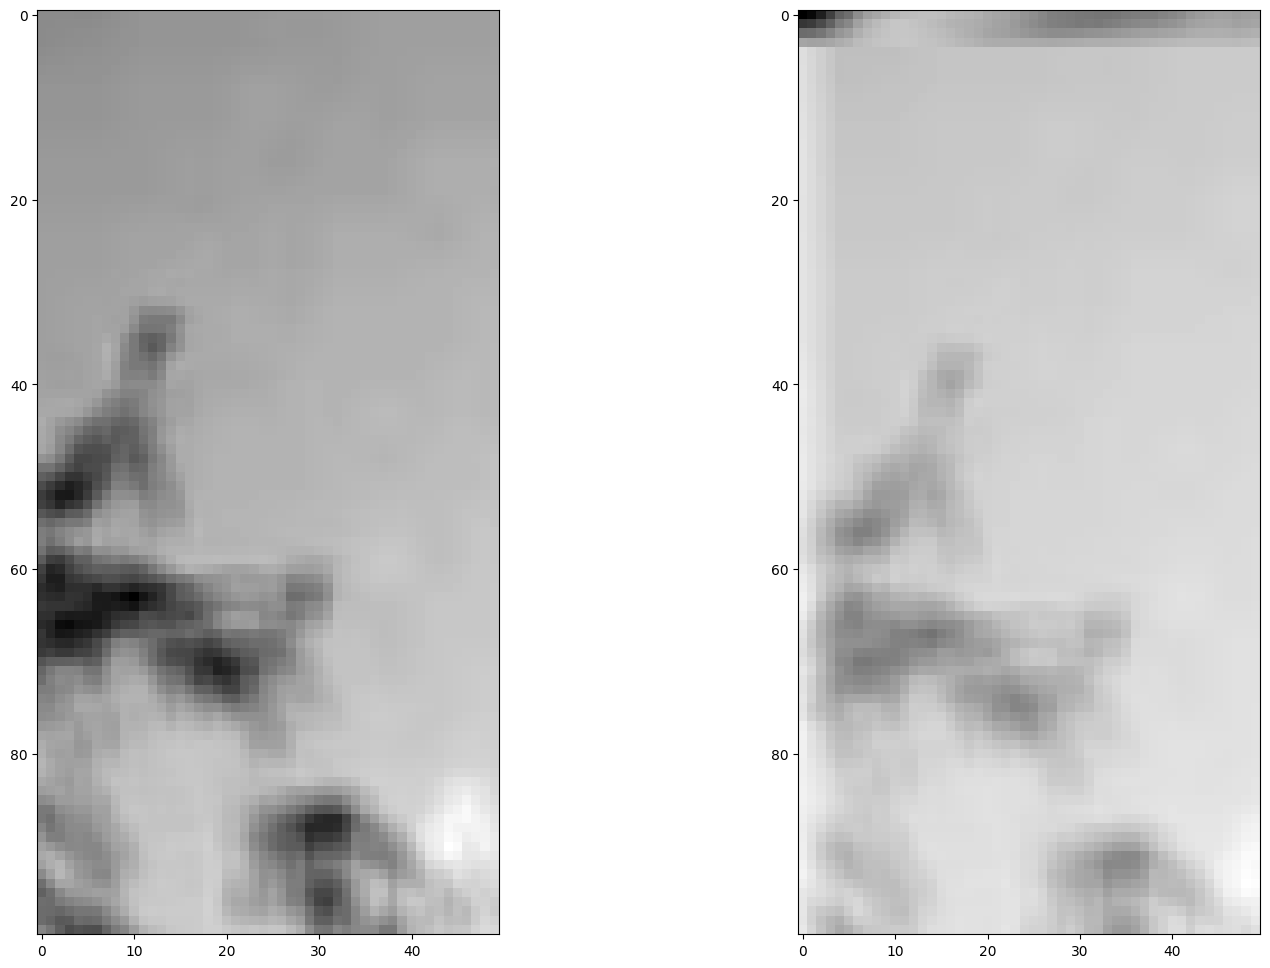

In [169]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18, 12)
ax[0].imshow(median_image[0:100, 0:50], cmap='grey')
ax[1].imshow(fft_median_image[0:100, 0:50], cmap='grey')